In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "/Users/daniellomeland/Matplotlib/Pyber/data/city_data.csv"
ride_data_to_load = "/Users/daniellomeland/Matplotlib/Pyber/data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(city_data_df, ride_data_df, how="right", on="city")

# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

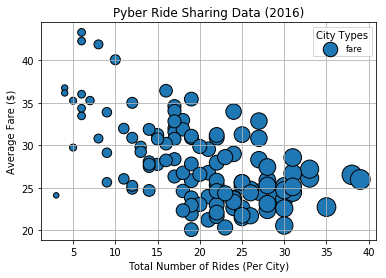

In [46]:
city_group = df.groupby('city')

num_rides = city_group['ride_id'].count()
ride_cost = city_group['fare'].mean()
num_drivers = city_group['driver_count'].count()

rural_data = df.loc[df['type'] == 'Rural']
urban_data = df.loc[df['type'] == 'Urban']
suburban_data = df.loc[df['type'] == 'Suburban']

# Obtain the x and y coordinates for each of the three city types

x = num_rides
y = ride_cost

plt.scatter(x, y, marker="o", edgecolors="black", s = num_drivers*10)
# Build the scatter plots for each city types


# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
lgnd = plt.legend(loc="upper right", title="City Types", fontsize="small")
#plt.legend(loc = "best")

# Incorporate a text label regarding circle size


# Save Figure
plt.savefig('Scatter_by_city_types')

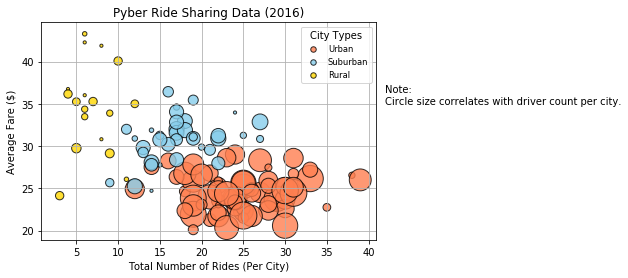

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

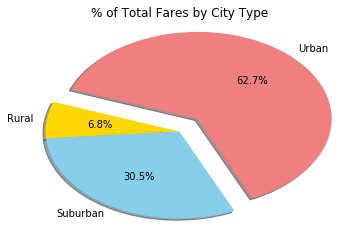

In [39]:
# Calculate Type Percents
tot_fares = df.groupby(['type'])['fare'].sum()
labels = ['Rural', 'Suburban', 'Urban']

# Build Pie Chart

plt.pie(tot_fares, explode=(0,0,.2), shadow=True, 
               colors=('gold','skyblue', 'lightcoral'), startangle=160, autopct="%1.1f%%", labels=labels)

plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('pie_fares_by_type')


## Total Rides by City Type

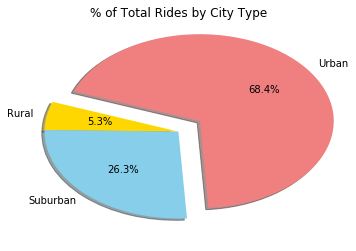

In [56]:
# Calculate Ride Percents

tot_rides = df.groupby(['type'])['ride_id'].count()

labels = ['Rural', 'Suburban', 'Urban']

# Build Pie Chart

plt.pie(tot_rides, explode=(0,0,.2), shadow=True, 
               colors=('gold','skyblue', 'lightcoral'), startangle=160, autopct="%1.1f%%", labels=labels)

plt.title("% of Total Rides by City Type")


# Save Figure

plt.savefig('pie_rides_by_type')


## Total Drivers by City Type

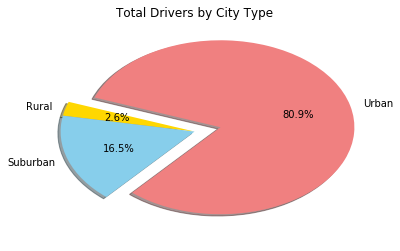

In [58]:
# Calculate Type Percents

city_data_df = city_data_df.drop_duplicates('city', keep = 'first')
tot_fares = city_data_df.groupby(['type'])['driver_count'].sum()
labels = ['Rural', 'Suburban', 'Urban']

# Build Pie Chart

plt.pie(tot_fares, explode=(0,0,.2), shadow=True, 
               colors=('gold','skyblue', 'lightcoral'), startangle=160, autopct="%1.1f%%", labels=labels)

plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig('pie_drivers_by_type')
